In [1]:
import matplotlib.pyplot as plt
from src.utils import *
from src.model_analysis.utils import same_output
from src.post_quant.cle import cle_for_resmlp
from src.post_quant.bias_absorb import ba_for_resmlp
from src.model_analysis.visualize import layer_dist, act_dist, simulate_input

org_model = resmlp_24(pretrained=True).eval()
model = resmlp_24(pretrained=True)
qmodel = q_resmlp24(model, full_precision_flag=True)

In [ ]:
# test CLE
model = resmlp_24(pretrained=True).eval()
cle_for_resmlp(model)
print(same_output(model, org_model, eps=1e-5))

True


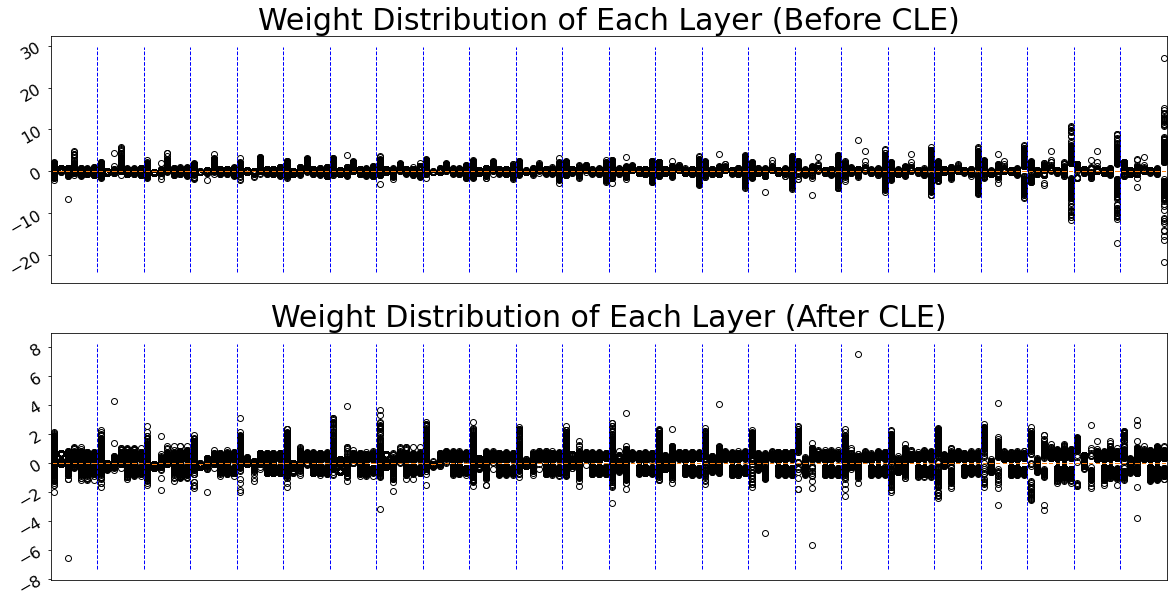

In [4]:
model = resmlp_24(pretrained=True).eval()
fig, ax = plt.subplots(2,1, figsize=(20, 10))
ax[0].get_xaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)

layer_dist(model, 0, 23, name='Weight Distribution of Each Layer (Before CLE)', ax=ax[0])
cle_for_resmlp(model)
# res_cle_for_resmlp(model)
# cle_for_resmlp(model)
layer_dist(model, 0, 23, name='Weight Distribution of Each Layer (After CLE)', ax=ax[1])

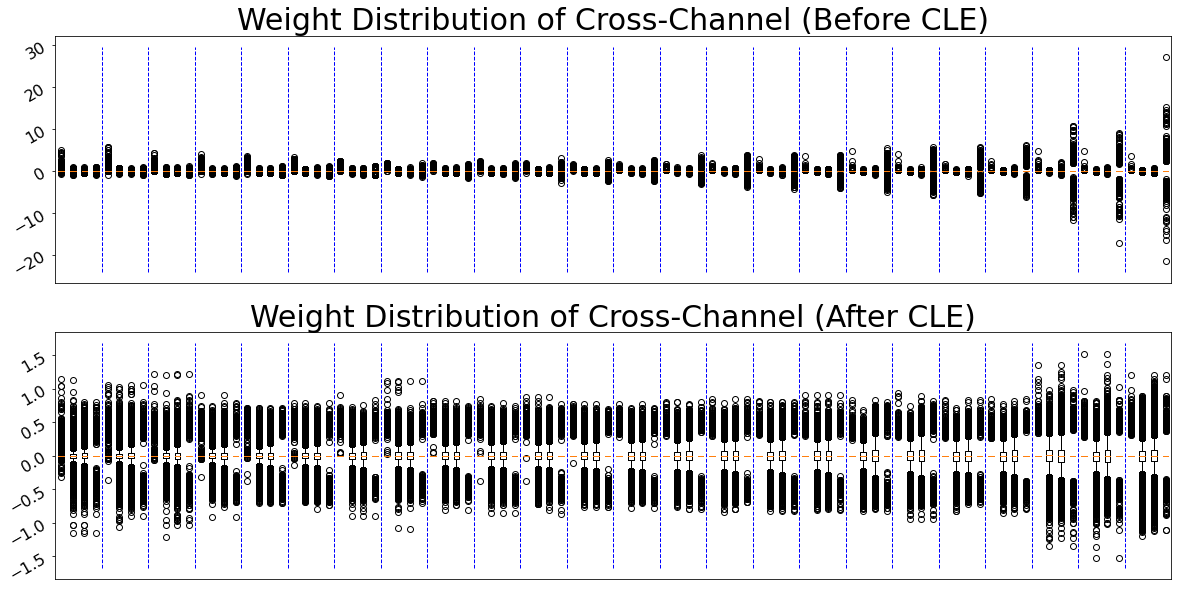

In [3]:
model = resmlp_24(pretrained=True).eval()
fig, ax = plt.subplots(2,1, figsize=(20, 10))
ax[0].get_xaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)

layer_dist(model, 0, 23, show_layers=["norm2", "mlp.fc1", "mlp.fc2", "gamma_2"], name='Weight Distribution of Cross-Channel (Before CLE)', ax=ax[0])
cle_for_resmlp(model)
layer_dist(model, 0, 23, show_layers=["norm2", "mlp.fc1", "mlp.fc2", "gamma_2"], name='Weight Distribution of Cross-Channel (After CLE)', ax=ax[1])

False tensor([-1.8610]) tensor([2.5354]) Parameter containing:
tensor([0.])


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

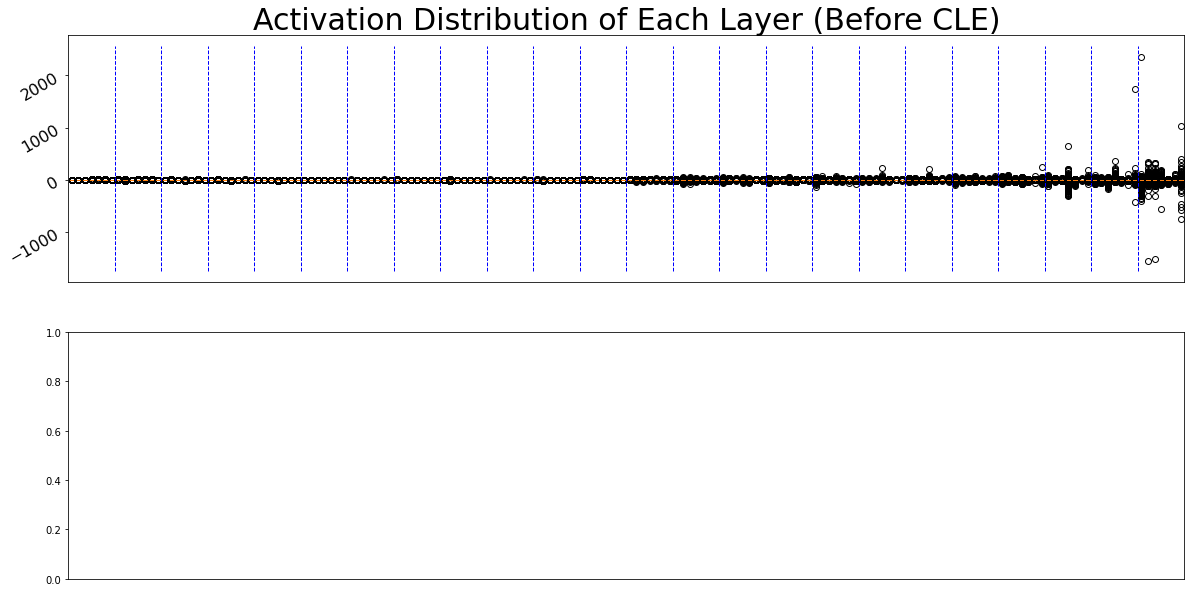

In [2]:
model = resmlp_24(pretrained=True).eval()
fig, ax = plt.subplots(2,1, figsize=(20, 10))
ax[0].get_xaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)

act_dist(model, 0, 23, name='Activation Distribution of Each Layer (Before CLE)', ax=ax[0])
cle_for_resmlp(model)
q_model = q_resmlp24(model)
q_model(simulate_input().cpu())
act_dist(model, 0, 23, name='Activation Distribution of Each Layer (After CLE)', ax=ax[1])

In [3]:
getattr(qmodel, f"layer0")

Q_Layer(
  (quant_act): QuantAct(activation_bit=4, full_precision_flag=True, Act_min: 0.00, Act_max: 0.00)
  (norm1): (QuantLinear(
    (linear): Linear(in_features=384, out_features=384, bias=True)
  ) weight_bit=4, bias_bit=32, full_precision_flag=True)
  (quant_act1): QuantAct(activation_bit=4, full_precision_flag=True, Act_min: 0.00, Act_max: 0.00)
  (attn): (QuantLinear(
    (linear): Linear(in_features=196, out_features=196, bias=True)
  ) weight_bit=4, bias_bit=32, full_precision_flag=True)
  (quant_act2): QuantAct(activation_bit=4, full_precision_flag=True, Act_min: 0.00, Act_max: 0.00)
  (gamma_1): (QuantLinear(
    (linear): Linear(in_features=384, out_features=384, bias=False)
  ) weight_bit=4, bias_bit=None, full_precision_flag=True)
  (quant_act_int32_1): QuantAct(activation_bit=4, full_precision_flag=True, Act_min: 0.00, Act_max: 0.00)
  (norm2): (QuantLinear(
    (linear): Linear(in_features=384, out_features=384, bias=True)
  ) weight_bit=4, bias_bit=32, full_precision_

In [5]:
# test bias absorption
model = resmlp_24(pretrained=True).eval()
ba_for_resmlp(model)
print(same_output(model, org_model, eps=1e-4))

Creating hooks...
Loading a small piece of training data...


FileNotFoundError: [WinError 3] 系統找不到指定的路徑。: '/mnt/disk1/imagenettrain'